# Task 4 : Sales Prediction using Python

*Varad Deshmukh*

**Instructions**

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

> ## Importing Libraries

In this project, along with the usual `NumPy` and `pandas`, we will need many modules from the `sklearn` library as well. To have an easier reference to the imported modules and classes and their usage at appropriate places, we will import them as they are required, and their rationale will be explained there itself.

In [24]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

> ## Loading the dataset

The survival data is present in the form of a 'csv' file named 'car_purchasing.csv'. We read that into a `pandas DataFrame` for subsequent analysis. The encoding for the file is `ISO-8859-1`.

In [2]:
# load the data into a pandas DataFrame and have a glimpse of it
car = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
car.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# information about the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


> ## Data Preprocessing

We analyze the data, the dayatypes of the columns and look for missing data values, if any.

In [4]:
# check for null values
car.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

This shows we have no null values in our dataset.

> ## Data Visualisation

For conducting the bivariate analysis, we plot all the numerical variables in our dataset, pair-wise. For this, we employ the `pairplot` as provided by `seaborn`. At the diagonal, is the histogram of the variable concerned, and all off-diagonal plots are bivariate scatter plots, showing the relation between all the numerical variables, pair-wise.

/Users/varad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


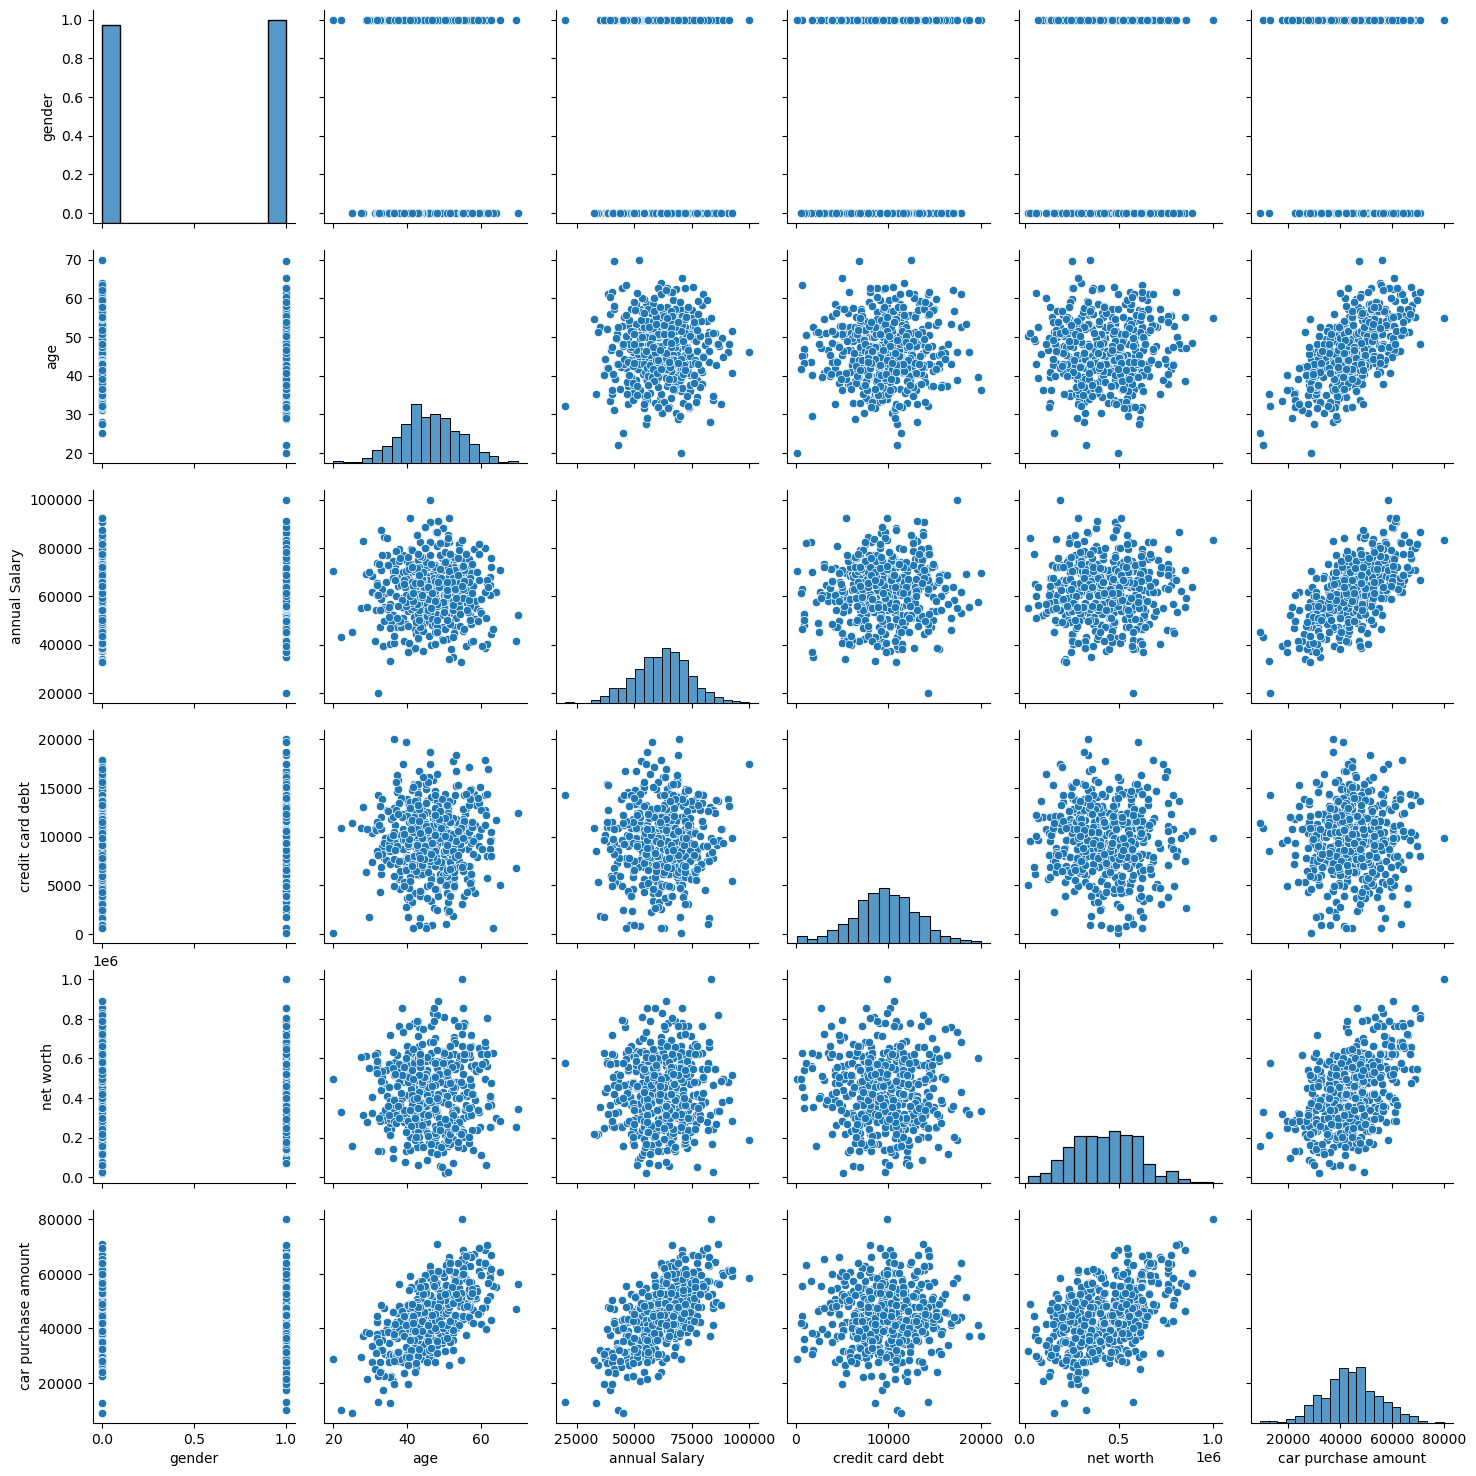

In [27]:
# plot all numerical variables pair-wise
sns.pairplot(car)

From the above pairplot, we see that only certain variables show some correlation with each other, viz. the variables age, annual salary and net worth show some sort of linear behaviour with the target car purchase amount, that we wish to predict. This means out features matrix must have these columns only. Moreover, we have a categorical variable in our data, in column 'country'. We hypothesise that the country could be an important factor in predicting the car purchase amount, because the target can be thought to be dependent on the economy of the country. So, we need to include the country column also in our model.

In [31]:
# check for correlation between the numerical variables
car.corr(numeric_only=True)

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
country,1.000000,-0.009850,0.016752,-0.007640,0.024502,0.038831,0.023906
gender,-0.009850,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,0.016752,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.007640,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024502,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.038831,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.023906,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


For getting a visual depiction of the correlation matrix, we plot a heatmap, with the colour scheme kept cool-warm.

<Axes: >

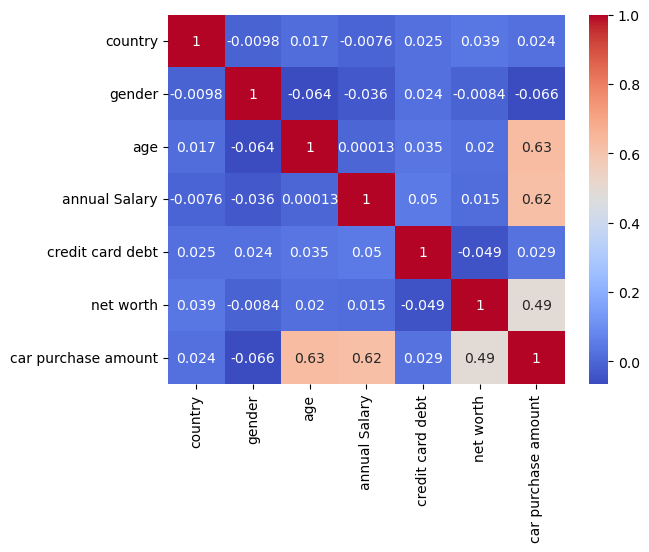

In [32]:
# plot the correlation matrix in the form of a heatmap
sns.heatmap(car.corr(numeric_only=True), annot=True, cmap='coolwarm')

Looking at the correlation matrix and the heat map, it is evident which features we should include in our features matrix.

> ## Label Encoding

The columns `country` needs to be included in our mode. So, we have to convert it into a numerical one. Label encoding is a simple and effective way to convert categorical variables into numerical form. By using the `LabelEncoder` class from `scikit-learn`, we can easily encode our categorical data. Here, the column `country` is categorical, for it to be fed into a machine learning model, we will need to convert it into a numerical value. This is done using label encoding here. This gives the countries a unique numerical value.

In [28]:
# use label encoding to convert categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
car['country'] = labels.fit_transform(car['country'])

In [30]:
# number of unique countries
car['country'].nunique()

211

So, we have converted the 211 country names, which was a categorical variable, into a numerical variable, which can be now fed to the model in the features matrix.

> ## Modelling the data



We employ a Linear Regression model here. For that, we first separate our data into the features and target matrix. Then we import the necessary modules and classes from scikit-learn, then train our model and then employ the model for predictions.

In [8]:
# convert data into features and target matrices
X = car.drop(columns=['customer name', 'customer e-mail', 'country', 'car purchase amount'], axis=1)
y = car['car purchase amount']

In [18]:
# import necessary modules and classes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# look how the training and test data looks like
print('Shapes :')
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

Shapes :
X_train :  (400, 5)
X_test :  (100, 5)
y_train :  (400,)
y_test :  (100,)


In [11]:
# instantiate the linear regression model
model = LinearRegression()

In [12]:
# fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# model predictions on the training data and ascertaining the r2-score
train_predictions = model.predict(X_train)
train_score = r2_score(train_predictions, y_train)

In [34]:
print('The R2 score of the model on training data is : ', train_score)

The R2 score of the model on training data is :  0.9999999796960078


In [35]:
# model predictions on the test data and ascertaining the r2-score
test_predictions = model.predict(X_test)
test_score = r2_score(test_predictions, y_test)

In [37]:
print('The R2 score of the model on test data is : ', test_score)

The R2 score of the model on test data is :  0.9999999866906936


This shows that our model is very much accurate in predicting the car purchase amount using the features that we decided. Thank You!